# **Task 2: Prediction using Unsupervised algorithm; K-Means Cluster using Python**

# **Submitted by: Sonalika Mehrotra**

In [18]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

data=pd.read_csv("Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# we drop the species column since it is a string datatype and we make predictions over a numerical datatype

data.drop(["Species"],axis="columns",inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


**We assign a portion of the dataset as training set**

In [21]:
x=data.iloc[:,[1,2,3,4]].values


In [22]:
from sklearn.cluster import KMeans


**We have to find the number of clusters and hence determine the value of K**


**We do this by the Elbow Technique**

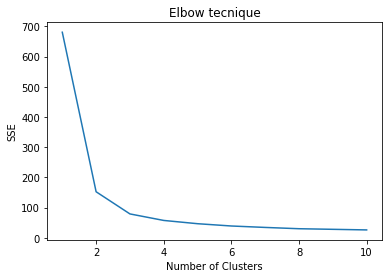

In [23]:
# finding optimum number of clusters for k means classifier

sse=[]
for k in range(1,11):
    km = KMeans(n_clusters=k,init="k-means++",max_iter=100,n_init=10,random_state=0)
    km.fit(x)
    sse.append(km.inertia_)
    
# plot the results in a line graph

plt.plot(range(1,11),sse)
plt.title("Elbow tecnique")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE") # sum of squared errors
plt.show()

By using the elbow technique, from the above graph we can clealy read the clusters. It is where the elbow occurs.
We choose the number of clusters as 3.

**We now apply the k-means clssifier to the dataset**

In [24]:
km = KMeans(n_clusters=3,max_iter=300,init="k-means++",random_state=0)
y_predict = km.fit_predict(x)

# we add another coloumn to the dataset of the classified values

data["predicted"]=y_predict
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


**Visualising the data**

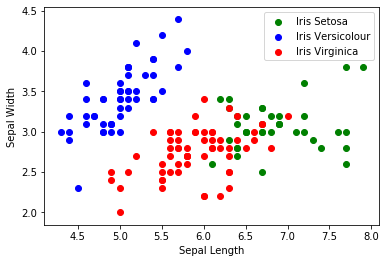

In [25]:
# we visualise the data on the sepal length and sepal width columns

df1 = data[data.predicted==0]
df2 = data[data.predicted==1]
df3 = data[data.predicted==2]

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color="green",label="Iris Setosa")
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color="blue",label="Iris Versicolour")
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,color="red",label="Iris Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [26]:
# checking for the points of centroids of the cluster

km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

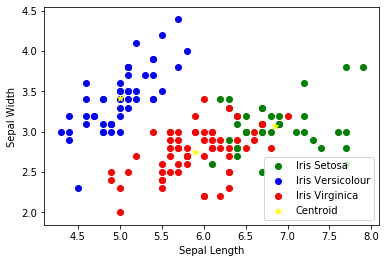

In [27]:
# plotting the centroids of the cluster 

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color="green",label="Iris Setosa")
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color="blue",label="Iris Versicolour")
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,color="red",label="Iris Virginica")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="yellow",label="Centroid",marker="*")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()